
# **Machine Learning - Practical Lab 2**
# **NAME AND SURNAME: Realeboga Sandra Moshotetsi**





# Load and Inspect Dataset


In [59]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Get the uploaded filename
file_name = list(uploaded.keys())[0]

# Load CSV
df = pd.read_csv(file_name)

# Show first 5 rows
df.head()


Saving diabetes_data_upload.csv to diabetes_data_upload (3).csv


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Identification

In [60]:
# Preview unique values per categorical column
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}: {df[col].unique()}")


Gender: ['Male' 'Female']

Polyuria: ['No' 'Yes']

Polydipsia: ['Yes' 'No']

sudden weight loss: ['No' 'Yes']

weakness: ['Yes' 'No']

Polyphagia: ['No' 'Yes']

Genital thrush: ['No' 'Yes']

visual blurring: ['No' 'Yes']

Itching: ['Yes' 'No']

Irritability: ['No' 'Yes']

delayed healing: ['Yes' 'No']

partial paresis: ['No' 'Yes']

muscle stiffness: ['Yes' 'No']

Alopecia: ['Yes' 'No']

Obesity: ['Yes' 'No']

class: ['Positive' 'Negative']


# Dataset Overview

In [61]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nTarget variable: class")

Shape of dataset: (520, 17)

Columns: ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

Target variable: class


# Missing Values




In [62]:
print("Missing values per column:\n")
print(df.isnull().sum())

Missing values per column:

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


# Feature Types

In [63]:
import pandas as pd

numerical_cols = [c for c in df.columns if df[c].dtype != "object" and c != "class"]
categorical_cols = [c for c in df.columns if df[c].dtype == "object" and c != "class"]

# Create table by padding shorter list with None
max_len = max(len(numerical_cols), len(categorical_cols))
num_list = numerical_cols + [None]*(max_len - len(numerical_cols))
cat_list = categorical_cols + [None]*(max_len - len(categorical_cols))

feature_types_df = pd.DataFrame({
    "Numerical Features": num_list,
    "Categorical Features": cat_list
})

feature_types_df

,Numerical Features,Categorical Features
0,Age,Gender
1,None,Polyuria
2,None,Polydipsia
3,None,sudden weight loss
4,None,weakness
5,None,Polyphagia
6,None,Genital thrush
7,None,visual blurring
8,None,Itching
9,None,Irritability



# Class Distribution


class
Positive    320
Negative    200
Name: count, dtype: int64


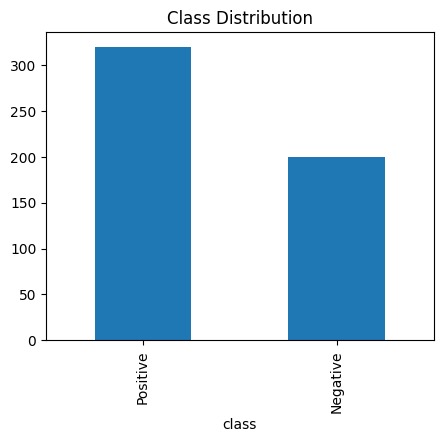

In [64]:
import matplotlib.pyplot as plt

class_counts = df["class"].value_counts()
print(class_counts)

plt.figure(figsize=(5,4))
class_counts.plot(kind="bar", title="Class Distribution")
plt.show()

# Descriptive Statistics

In [65]:
desc_stats = df[numerical_cols].describe().T[["mean","std","min","50%","max"]]
desc_stats.rename(columns={"50%": "median"}, inplace=True)  # rename for clarity
desc_stats


,mean,std,min,median,max
Age,48.028846,12.151466,16.0,47.5,90.0


# Visualizations

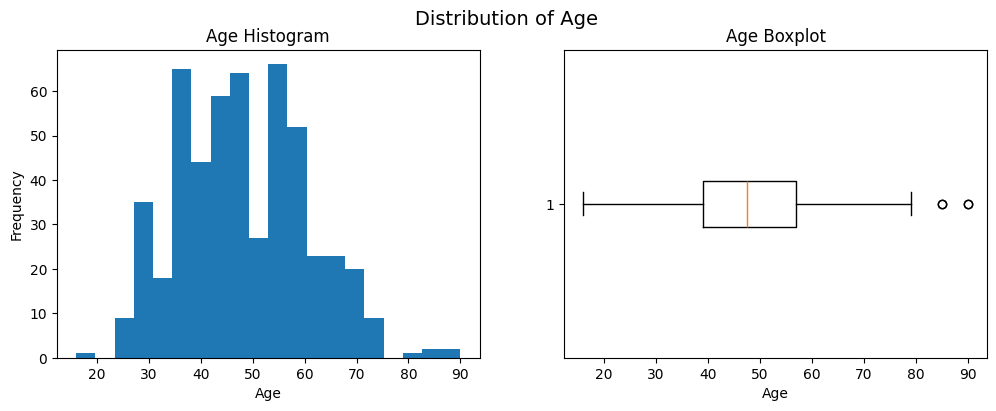

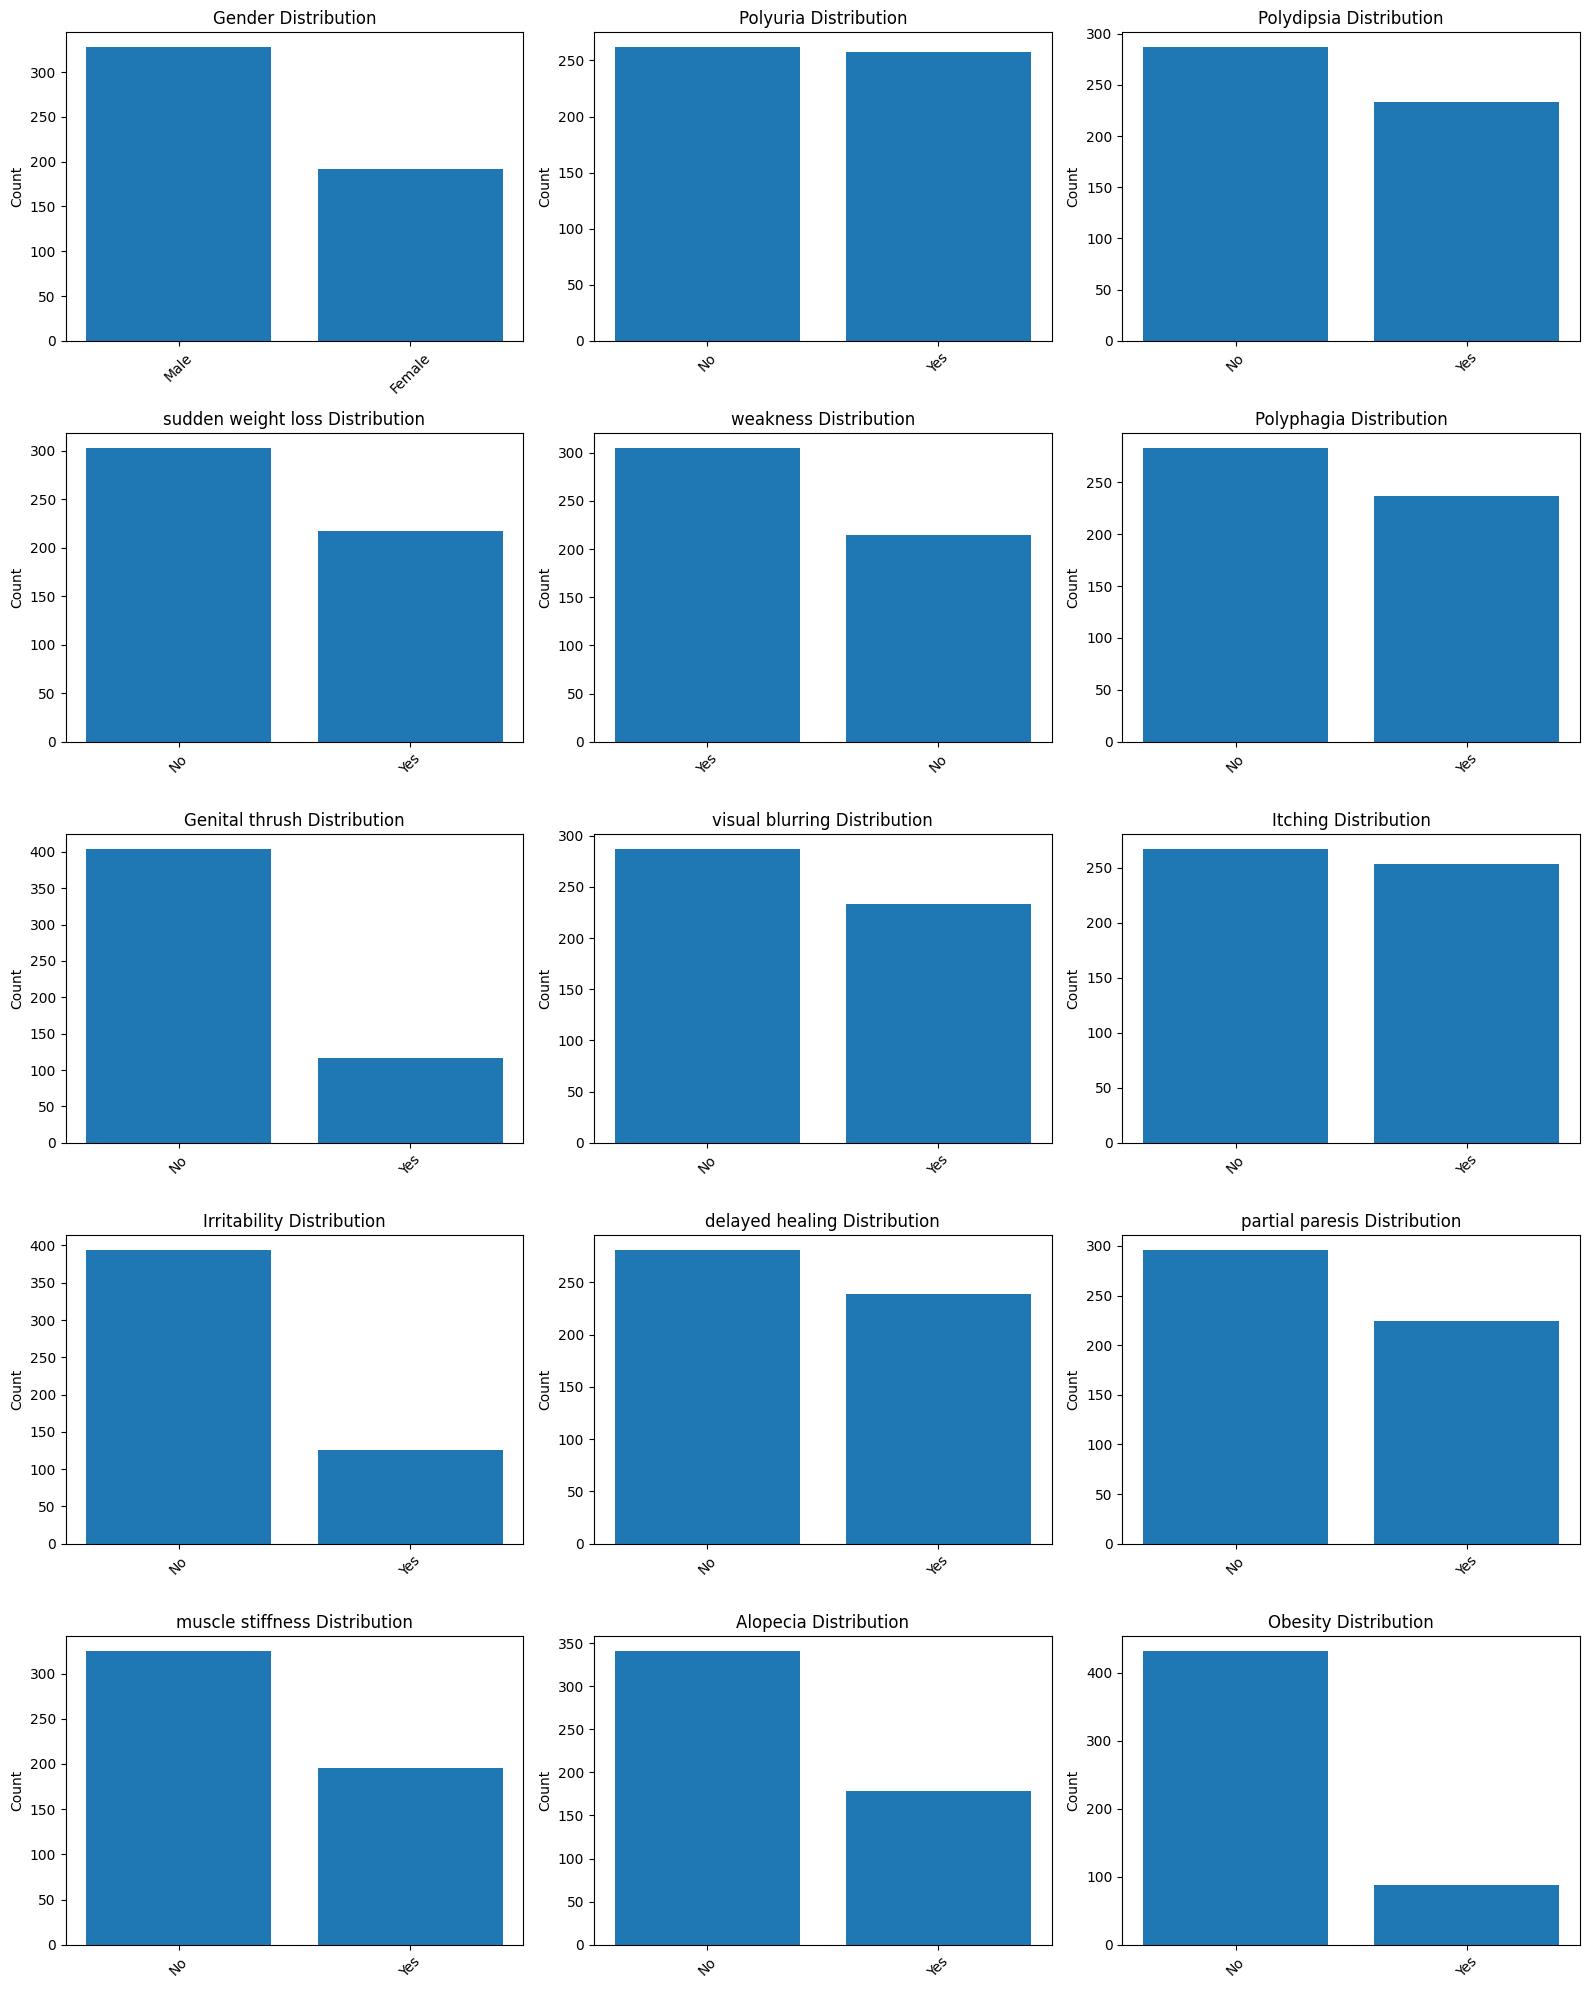

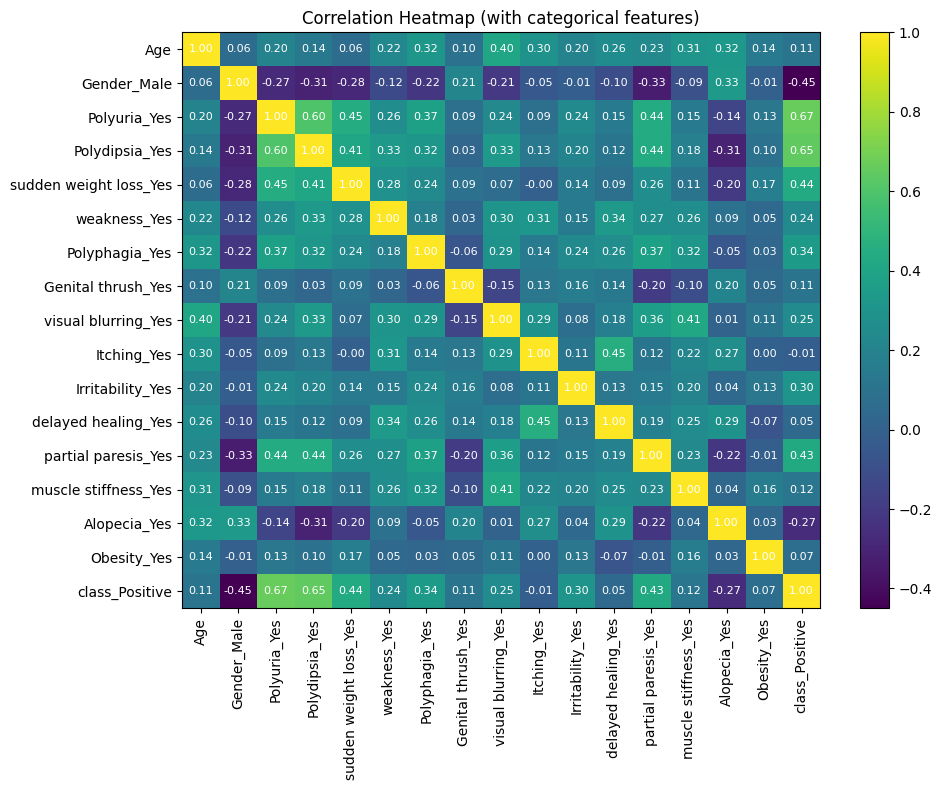

In [73]:
import matplotlib.pyplot as plt

# Numerical features: histogram + boxplot side by side
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Histogram
    axes[0].hist(df[col], bins=20)
    axes[0].set_title(f"{col} Histogram")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    # Boxplot
    axes[1].boxplot(df[col], vert=False)
    axes[1].set_title(f"{col} Boxplot")
    axes[1].set_xlabel(col)

    plt.suptitle(f"Distribution of {col}", fontsize=14)
    plt.show()

# Categorical features: bar charts in rows of 3 per figure
n = len(categorical_cols)
cols_per_row = 3
rows = (n // cols_per_row) + int(n % cols_per_row != 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    axes[i].bar(df[col].value_counts().index, df[col].value_counts().values)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Example: include categorical features by encoding them
df_encoded = pd.get_dummies(df, drop_first=True)   # one-hot encode categoricals
corr = df_encoded.corr()                           # correlation on full data

# Plot correlation heatmap
plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap="viridis", aspect="auto")

# Axis ticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)

# Add numbers in each cell
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="white", fontsize=8)

plt.colorbar(im)
plt.title("Correlation Heatmap (with categorical features)")
plt.tight_layout()
plt.show()

# Preprocessing

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(columns=["class"])
y = df["class"]

# Pipelines
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Modelling

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

pipelines = {}
for name, clf in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("clf", clf)
    ])
    pipe.fit(X_train, y_train)
    pipelines[name] = pipe

# Evaluation

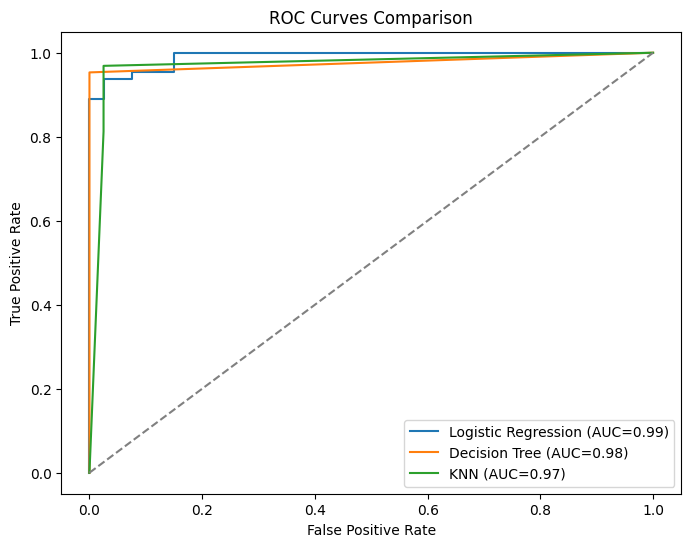

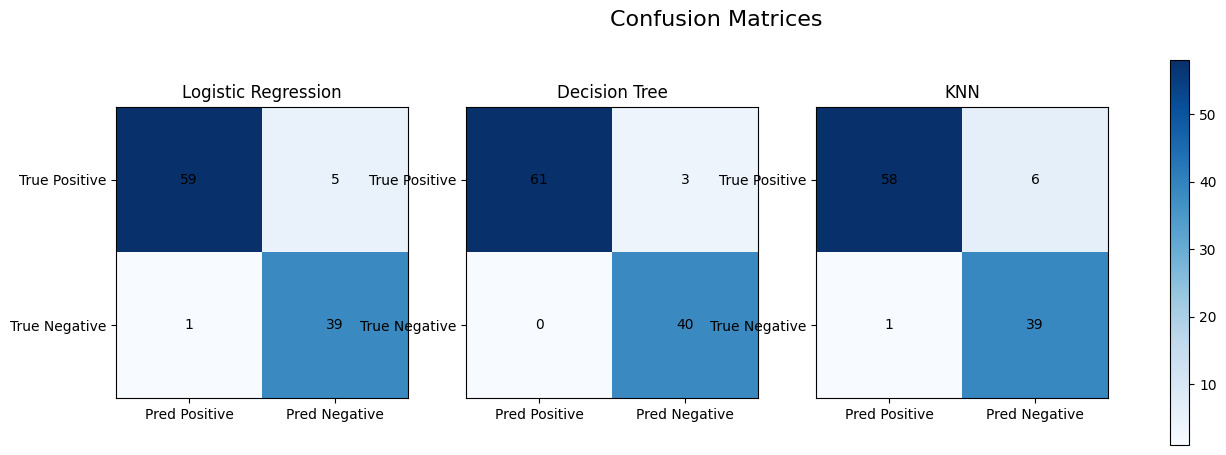


Model Evaluation Metrics (All-in-One):

              Model  Accuracy  Precision   Recall       F1      AUC
Logistic Regression  0.942308   0.983333 0.921875 0.951613 0.990625
      Decision Tree  0.971154   1.000000 0.953125 0.976000 0.976562
                KNN  0.932692   0.983051 0.906250 0.943089 0.969922

Accuracy Comparison:

              Model  Accuracy
Logistic Regression  0.942308
      Decision Tree  0.971154
                KNN  0.932692

Precision Comparison:

              Model  Precision
Logistic Regression   0.983333
      Decision Tree   1.000000
                KNN   0.983051

Recall Comparison:

              Model   Recall
Logistic Regression 0.921875
      Decision Tree 0.953125
                KNN 0.906250

F1-Score Comparison:

              Model       F1
Logistic Regression 0.951613
      Decision Tree 0.976000
                KNN 0.943089


/tmp/ipython-input-2939605763.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
/tmp/ipython-input-2939605763.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
/tmp/ipython-input-2939605763.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")
/tmp/ipython-input-2939605763.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")


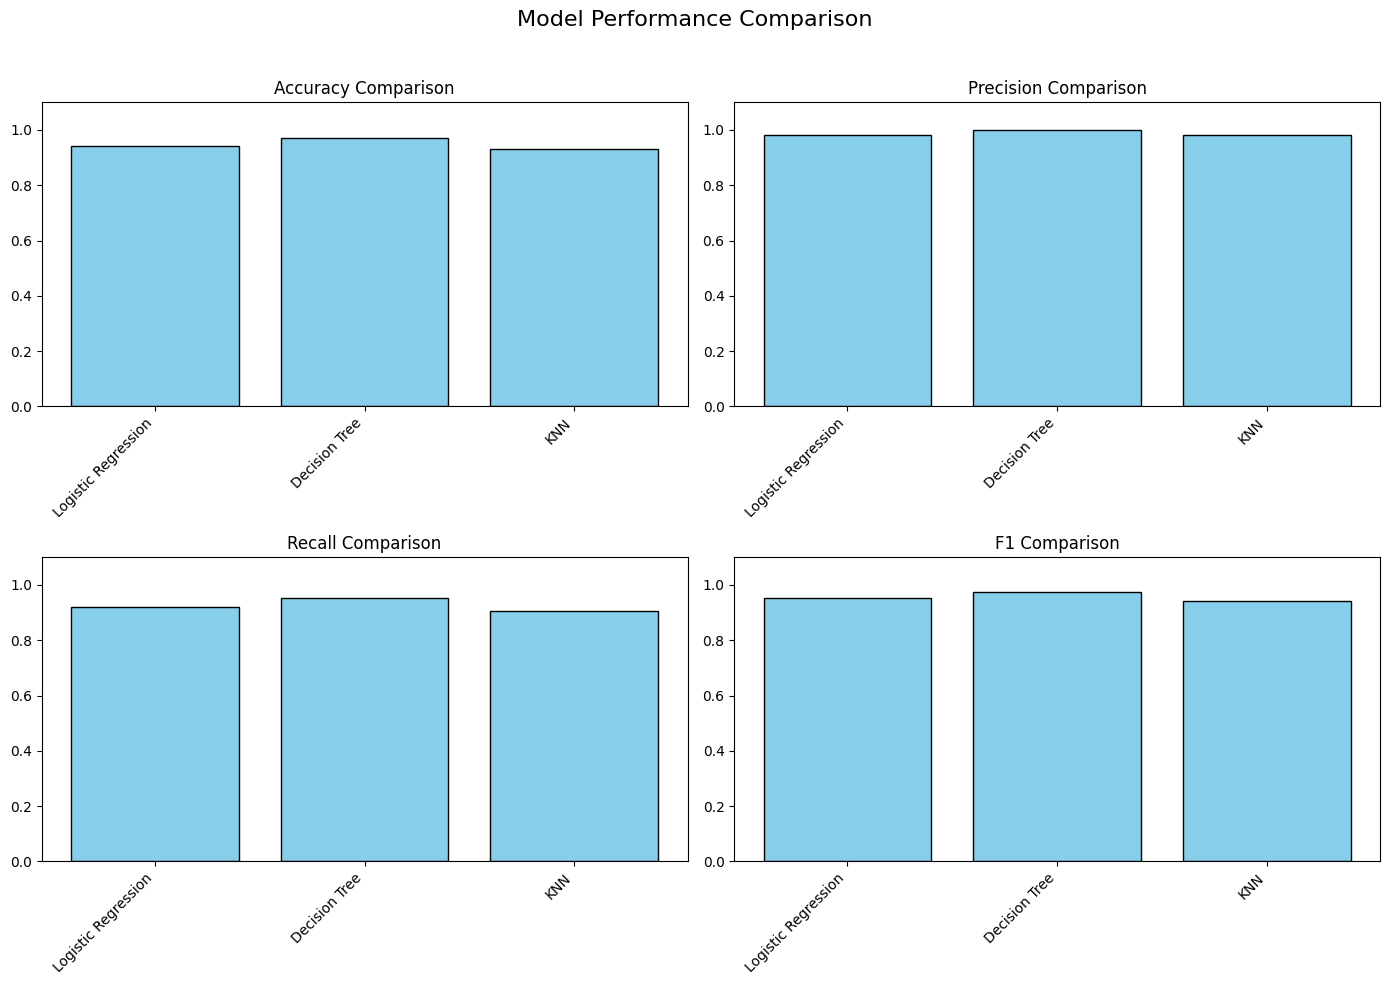

In [70]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

results = []

# ROC Curves (all models in one plot)
plt.figure(figsize=(8,6))

for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_test)
    y_score = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps["clf"], "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="Positive")
    rec = recall_score(y_test, y_pred, pos_label="Positive")
    f1 = f1_score(y_test, y_pred, pos_label="Positive")
    auc = roc_auc_score((y_test=="Positive").astype(int), y_score) if y_score is not None else None

    results.append([name, acc, prec, rec, f1, auc])

    # ROC curve
    if y_score is not None:
        fpr, tpr, _ = roc_curve((y_test=="Positive").astype(int), y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

# Add diagonal baseline
plt.plot([0,1],[0,1],'--', color="gray")
plt.legend()
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Confusion Matrices (all side-by-side in one figure)
fig, axes = plt.subplots(1, len(pipelines), figsize=(16,5))

for ax, (name, pipe) in zip(axes, pipelines.items()):
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=["Positive","Negative"])
    im = ax.imshow(cm, cmap="Blues")

    ax.set_title(name)
    ax.set_xticks([0,1])
    ax.set_xticklabels(["Pred Positive","Pred Negative"])
    ax.set_yticks([0,1])
    ax.set_yticklabels(["True Positive","True Negative"])

    # Label cells
    for (i,j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center", color="black")

fig.colorbar(im, ax=axes.ravel().tolist())
plt.suptitle("Confusion Matrices", fontsize=16)
plt.show()

# Metrics Table (all-in-one)
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","AUC"])
print("\nModel Evaluation Metrics (All-in-One):\n")
print(results_df.to_string(index=False))

# Separate Tables per Metric
print("\nAccuracy Comparison:\n")
print(results_df[["Model","Accuracy"]].to_string(index=False))

print("\nPrecision Comparison:\n")
print(results_df[["Model","Precision"]].to_string(index=False))

print("\nRecall Comparison:\n")
print(results_df[["Model","Recall"]].to_string(index=False))

print("\nF1-Score Comparison:\n")
print(results_df[["Model","F1"]].to_string(index=False))


# Comparison Graphs (Bar Charts) with 2 per line
metrics = ["Accuracy", "Precision", "Recall", "F1"]

fig, axes = plt.subplots(2, 2, figsize=(14,10))  # 2 rows, 2 columns
axes = axes.ravel()  # flatten the 2x2 array for easy iteration

for i, metric in enumerate(metrics):
    axes[i].bar(results_df["Model"], results_df[metric], color="skyblue", edgecolor="black")
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylim(0,1.1)
    axes[i].set_xticklabels(results_df["Model"], rotation=45, ha="right")

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the main title
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt


